# Capstone Project on Churning Data

# `1) Business Understanding`:-

### *1) Business Objective:*

* `Customer churn` is a concerning problem for large companies (especially in the Telecom field) due to its direct effect on the revenues.
* Our Objective is to know which customers are likely to churn in the near future so that a timely action could be taken to prevent it.

### *2) Determing the Data mining goals:*

* We need to find a trend that will help us to create the best possible model for predicting the people who are most likely to churn.

##############################################################################################################################

# `2) Data Understanding`:-

`Importing of Lbraries`

In [1]:
import pandas as pd
import numpy as np

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

`Fetching the dataset`:

In [2]:
df = pd.read_csv("Dataset.csv")
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


## Exploratory Data Analysis (EDA) <a class="anchor" id="eda"></a>

### 2.1 Data Exploration <a class="anchor" id="dx"></a>

In [3]:
print("Dataset shape:", df.shape)

Dataset shape: (3333, 11)


In [4]:
#Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [5]:
# check for missing values:
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [6]:
print("Summary statistics:")
display(df.describe())

Summary statistics:


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [7]:
#checking duplicate values 
df.nunique()

Churn                 2
AccountWeeks        212
ContractRenewal       2
DataPlan              2
DataUsage           174
CustServCalls        10
DayMins            1667
DayCalls            119
MonthlyCharge       627
OverageFee         1024
RoamMins            162
dtype: int64

### 2.2 Univariate Analysis   <a class="anchor" id="ua"></a>

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
Category = ["Churn","ContractRenewal","DataPlan", "CustServCalls"]
df_for_analysis = df.drop(Category, axis = 1)
df_for_analysis

,AccountWeeks,DataUsage,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,2.70,265.1,110,89.0,9.87,10.0
1,107,3.70,161.6,123,82.0,9.78,13.7
2,137,0.00,243.4,114,52.0,6.06,12.2
3,84,0.00,299.4,71,57.0,3.10,6.6
4,75,0.00,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...
3328,192,2.67,156.2,77,71.7,10.78,9.9
3329,68,0.34,231.1,57,56.4,7.67,9.6
3330,28,0.00,180.8,109,56.0,14.44,14.1
3331,184,0.00,213.8,105,50.0,7.98,5.0


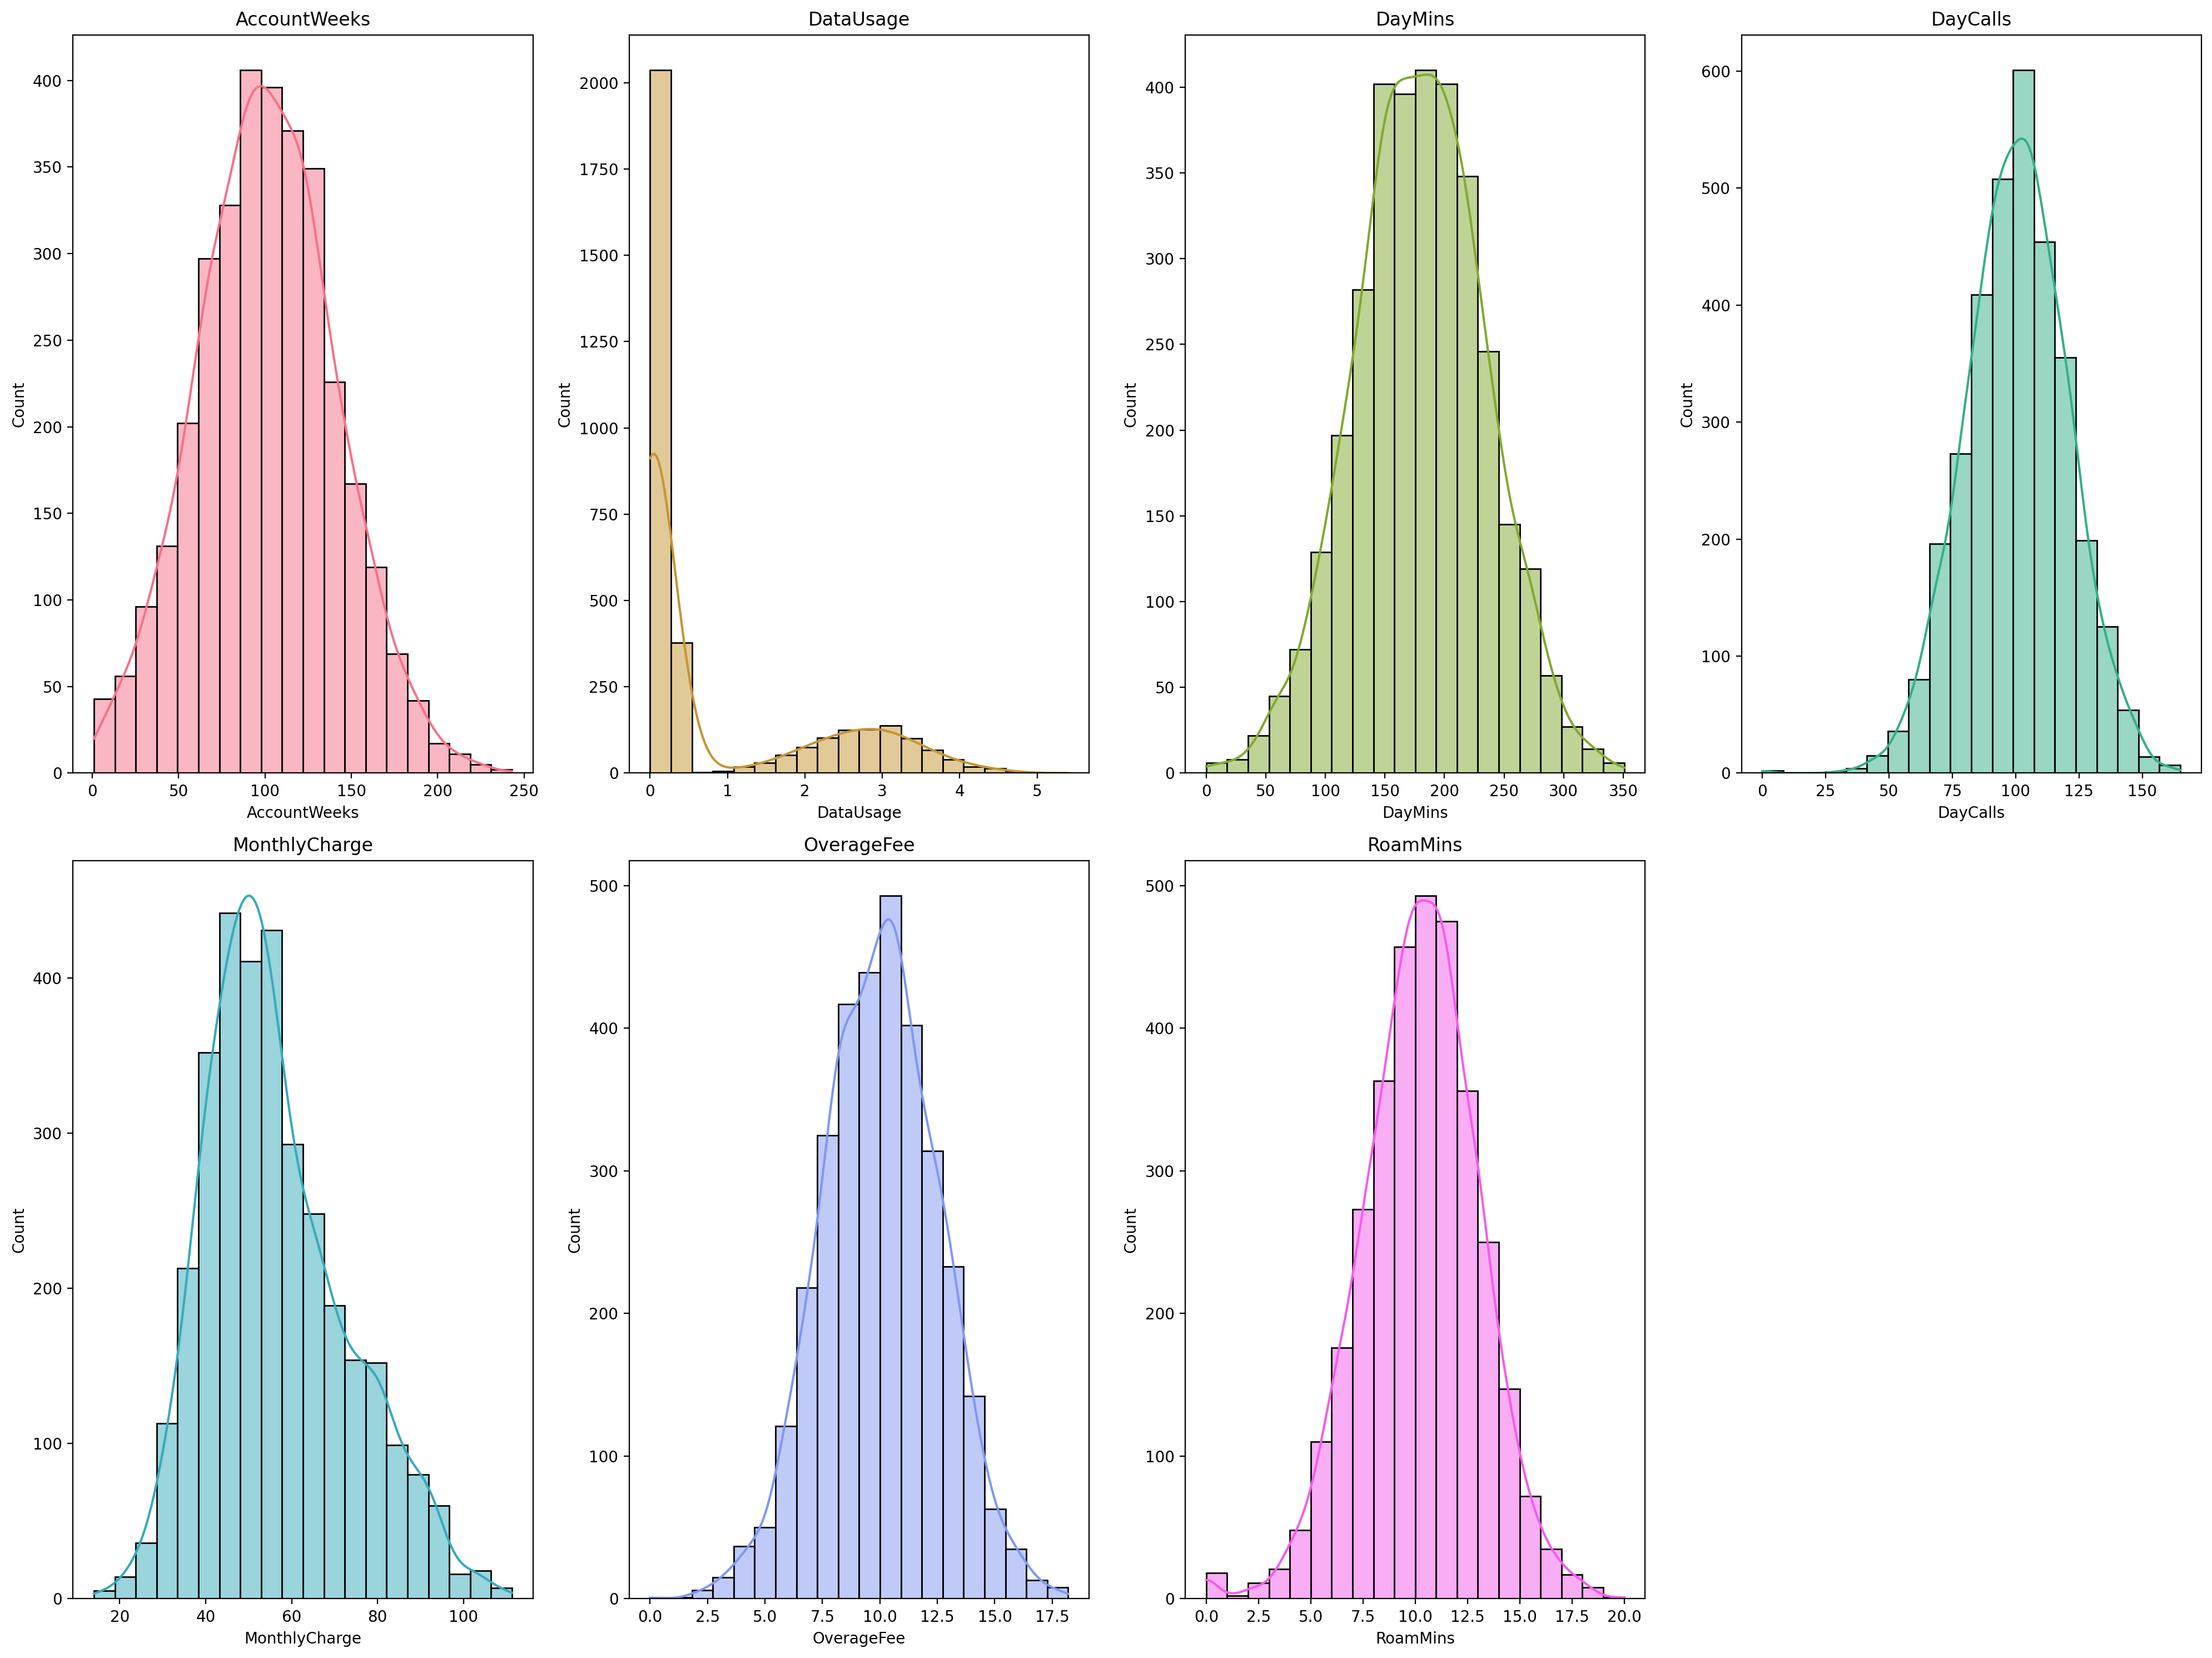

In [10]:
# Set a custom color palette
custom_palette = sns.color_palette("husl", len(df_for_analysis.columns))

# Assuming df_for_analysis is your DataFrame containing the continuous data
plt.figure(figsize=(20, 15))  # Adjust the figure size to accommodate 7 subplots

for i, col in enumerate(df_for_analysis.columns):
    plt.subplot(2, 4, i+1)  # Create a 2x4 grid for the subplots
    sns.histplot(df_for_analysis[col], bins=20, kde=True, color=custom_palette[i])
    plt.title(col)

plt.tight_layout()
plt.show()

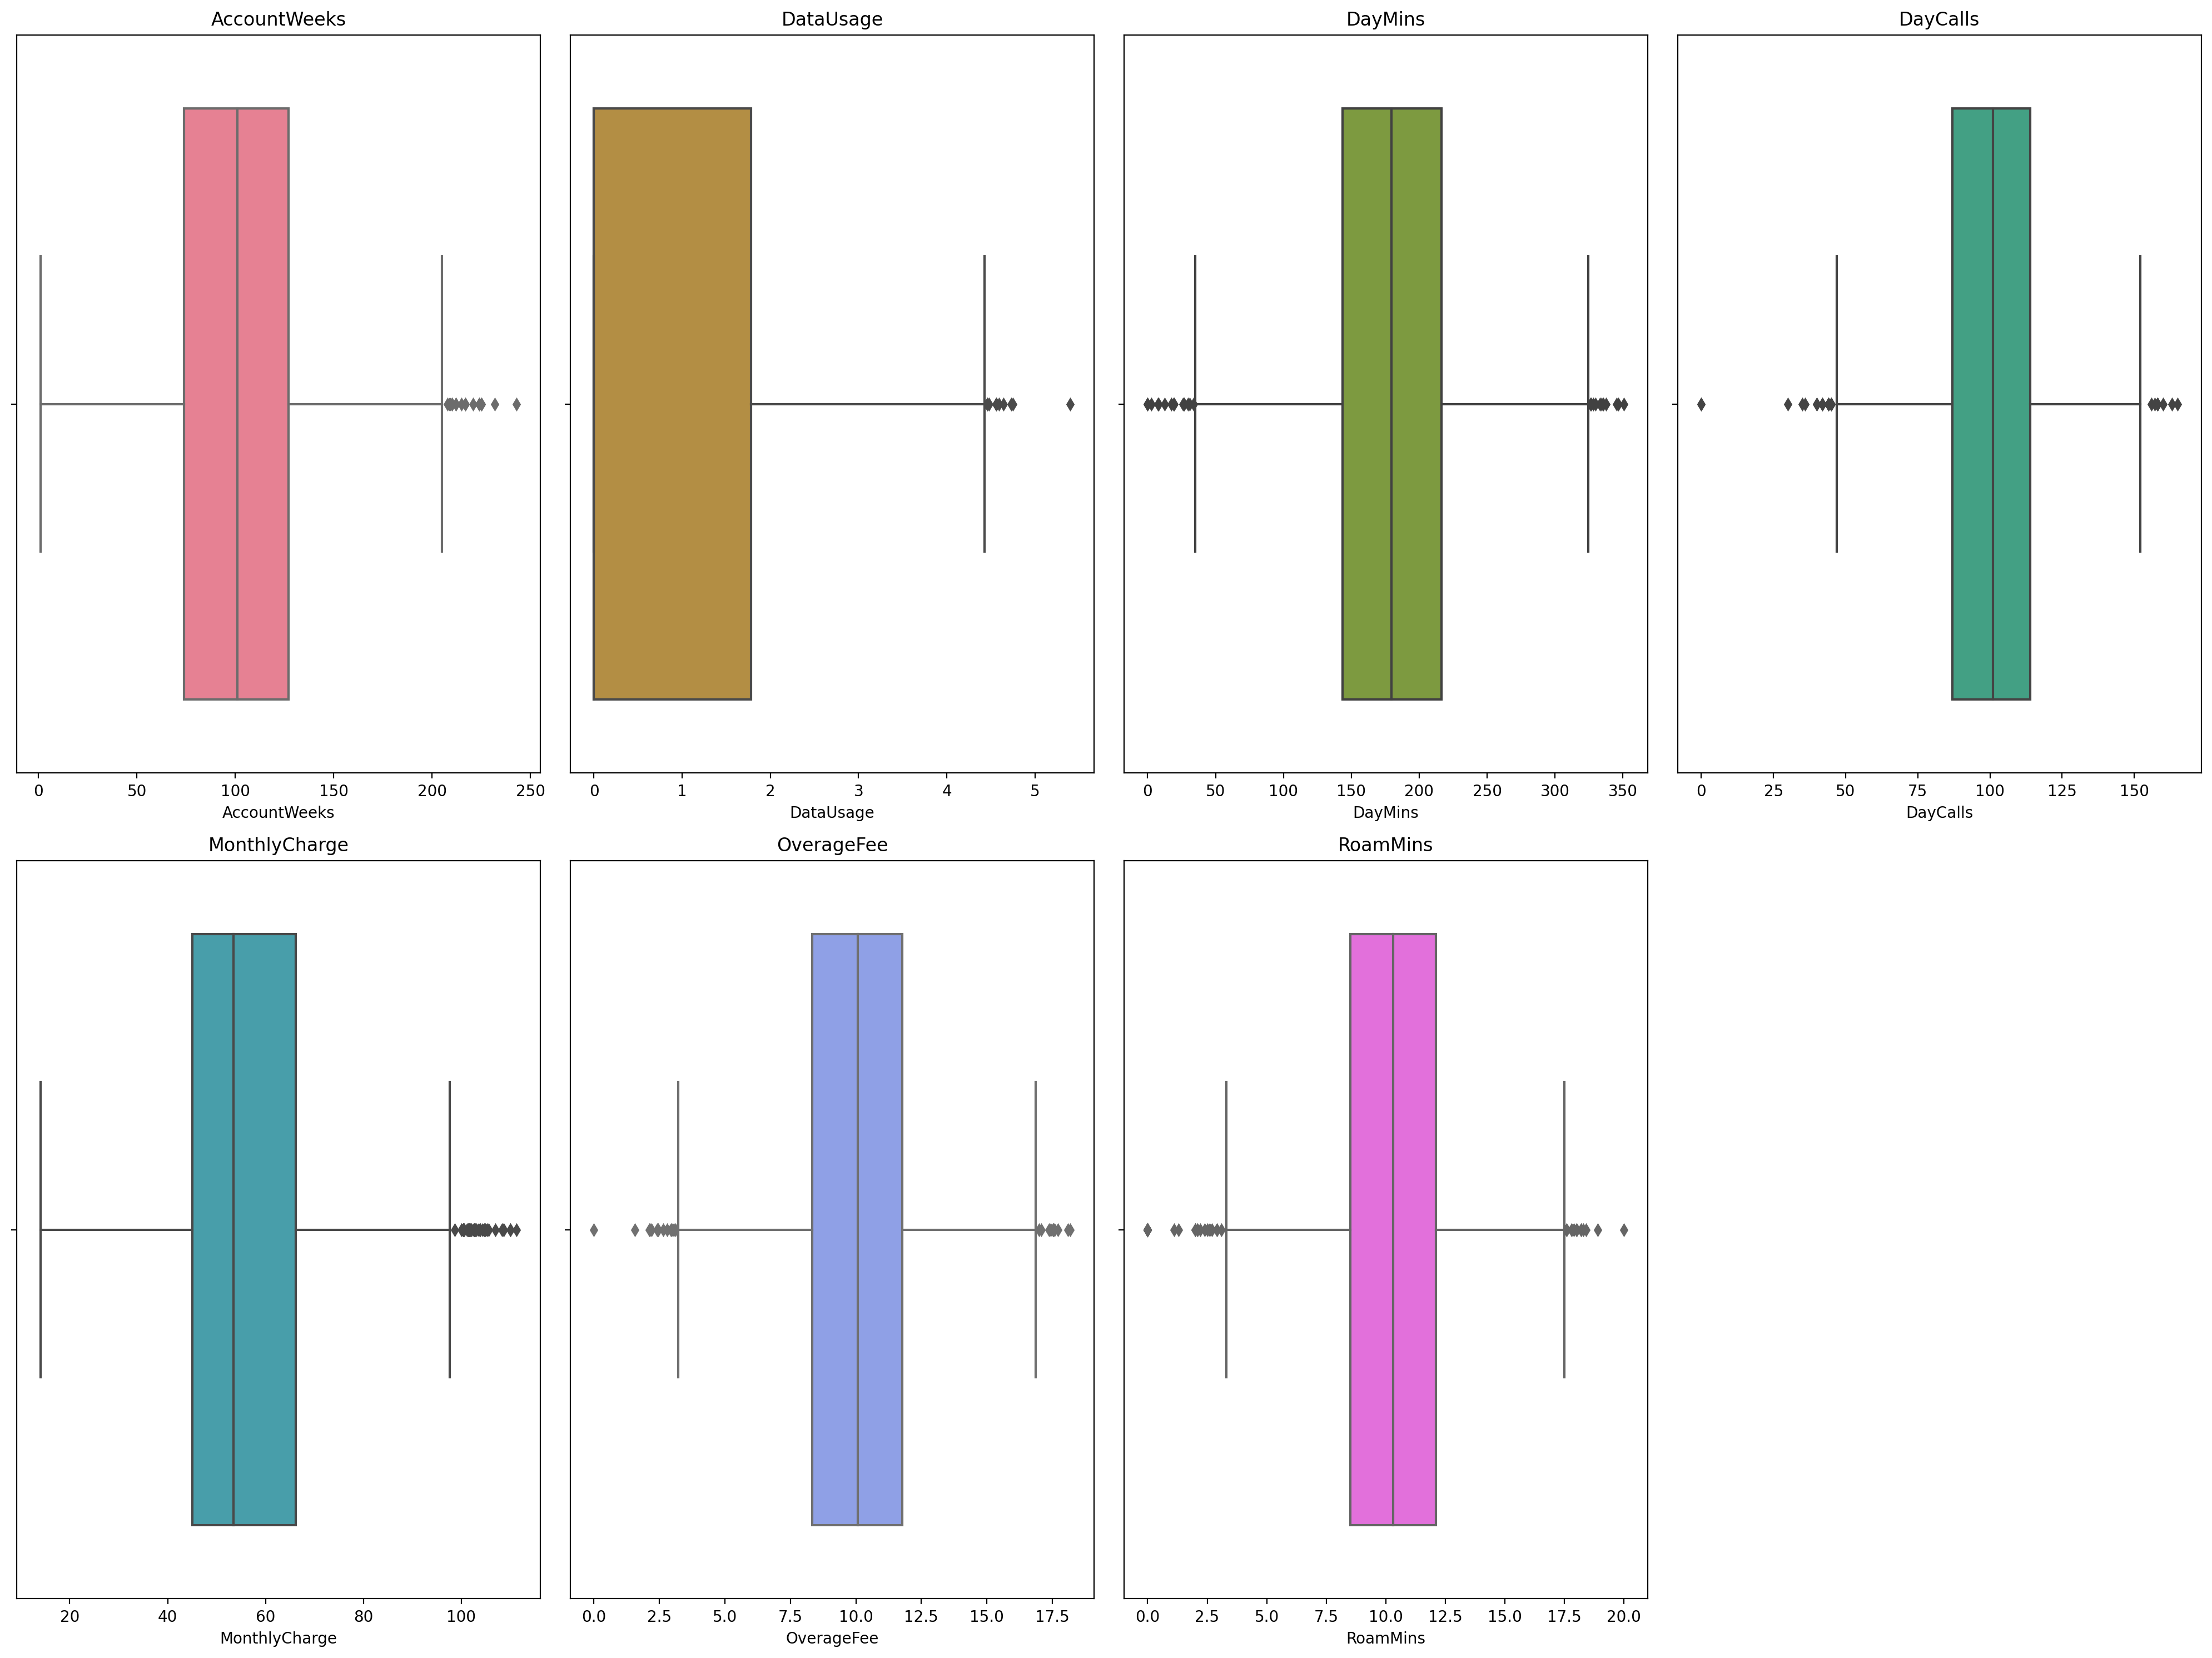

In [11]:
# Set a custom color palette
custom_palette = sns.color_palette("husl", len(df_for_analysis.columns))

# Assuming df_for_analysis is your DataFrame containing the continuous data
plt.figure(figsize=(20, 15))  # Adjust the figure size to accommodate 7 subplots

for i, col in enumerate(df_for_analysis.columns):
    plt.subplot(2, 4, i+1)  # Create a 2x4 grid for the subplots
    sns.boxplot(x=df_for_analysis[col], color=custom_palette[i])
    plt.title(col)

plt.tight_layout()
plt.show()

### 2.3 Multivariate Analysis <a class="anchor" id="ba"></a>

### Correlation Matrix


Correlation heatmap:


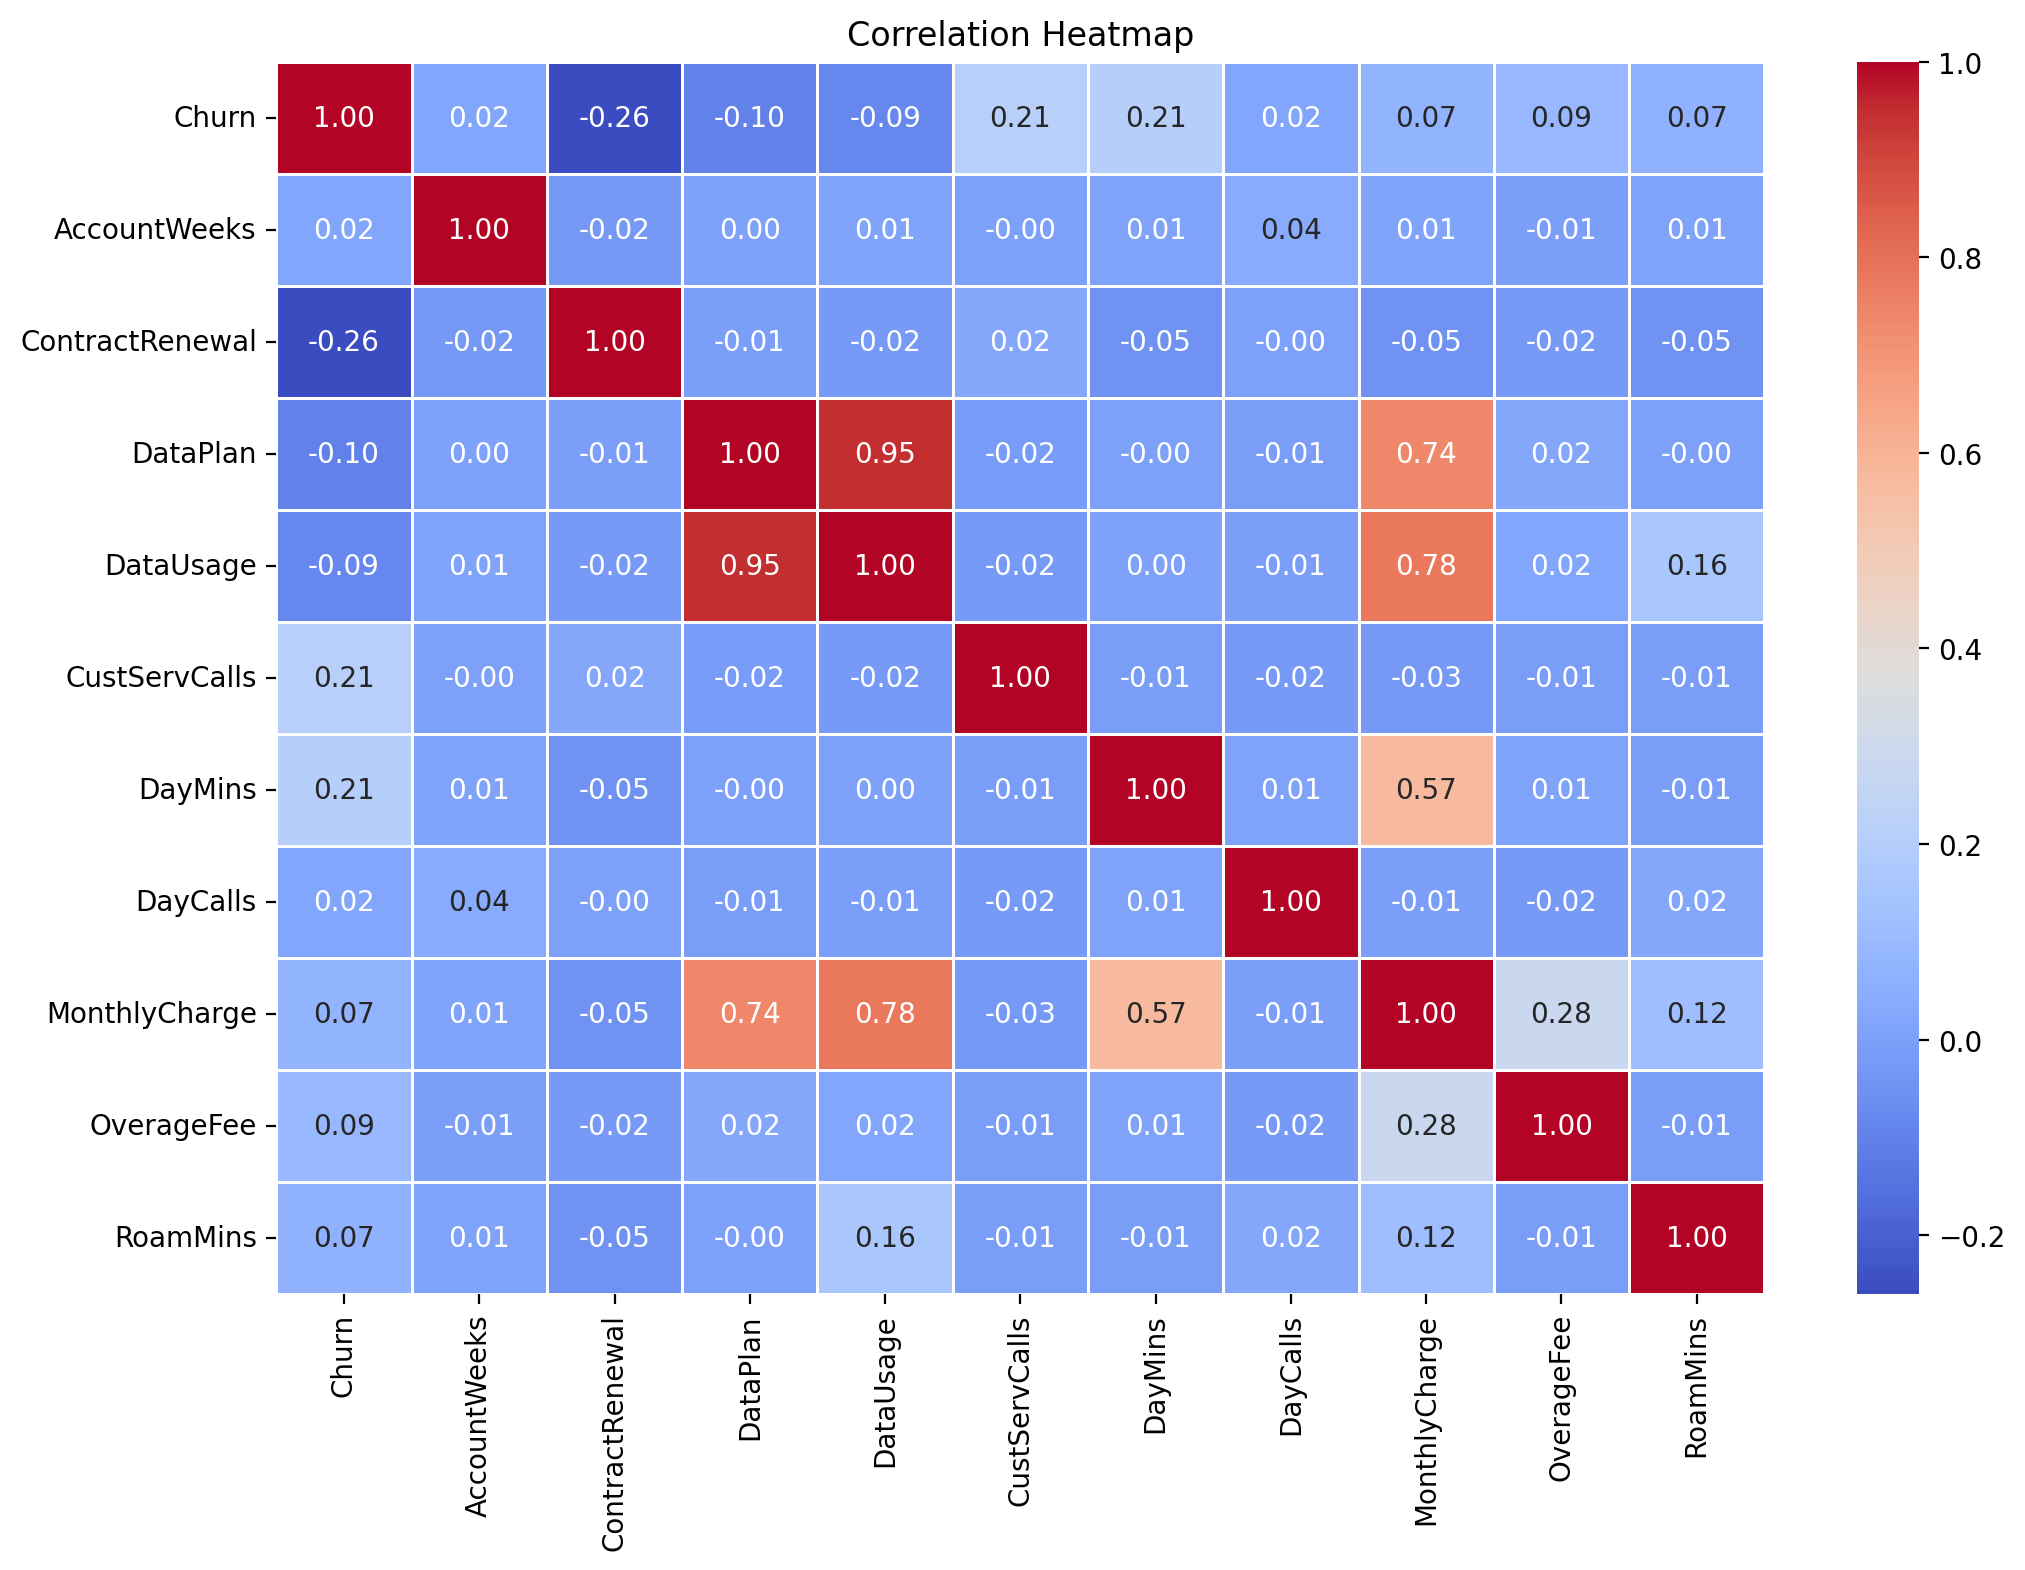

In [12]:
# Correlation heatmap
print("\nCorrelation heatmap:")
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

- As per **`correlation matrix`** - Contract Renewal, CustServCalls and DayMins have the top correlation with Churn.

### Histogram

<Axes: xlabel='DataPlan', ylabel='count'>

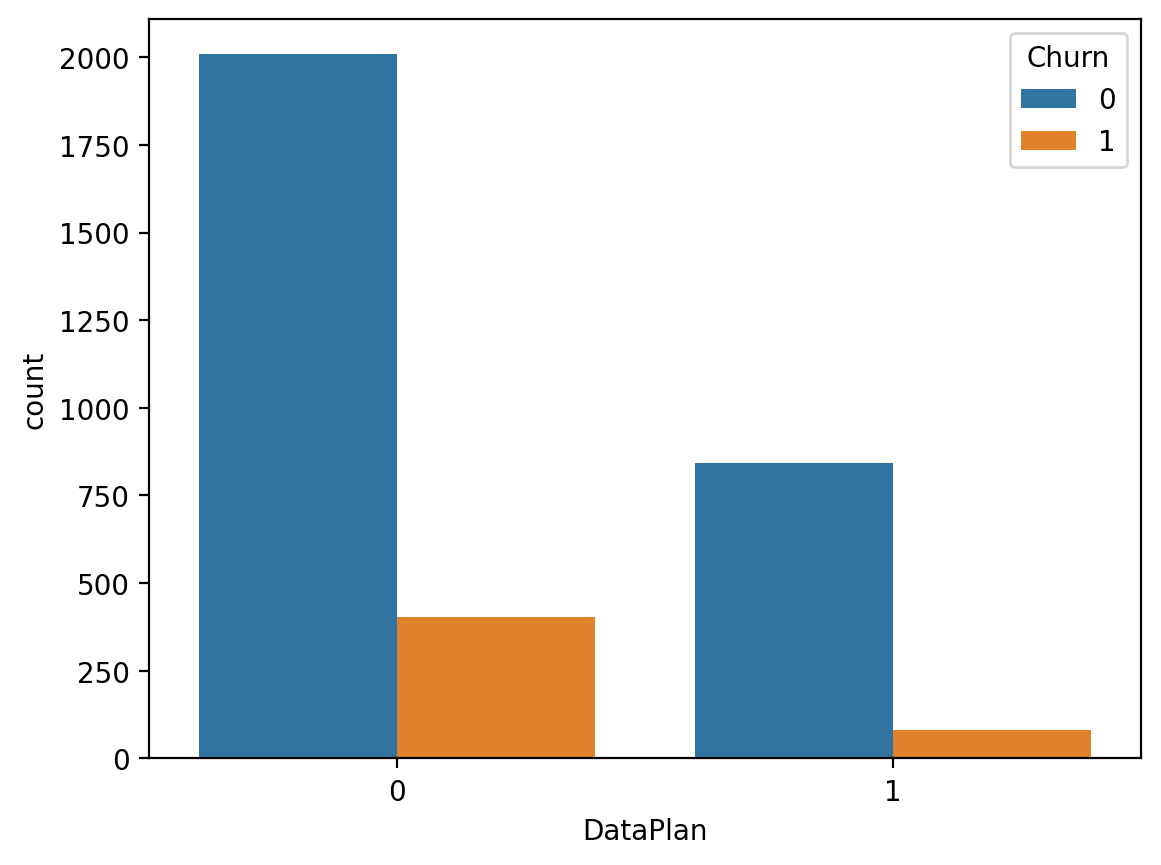

In [13]:
sns.countplot(x = "DataPlan", hue = "Churn", data = df)

- As per **`Histogram`** of `Data Plan VS Churn`- We can see that 20% of the population who did not opt for the data plan churned where as ~10% of people who took the plan churn, suggesting that the prices maybe expensive for people and once the data plan was taken, there was not much of an issue with the services due to data plan.

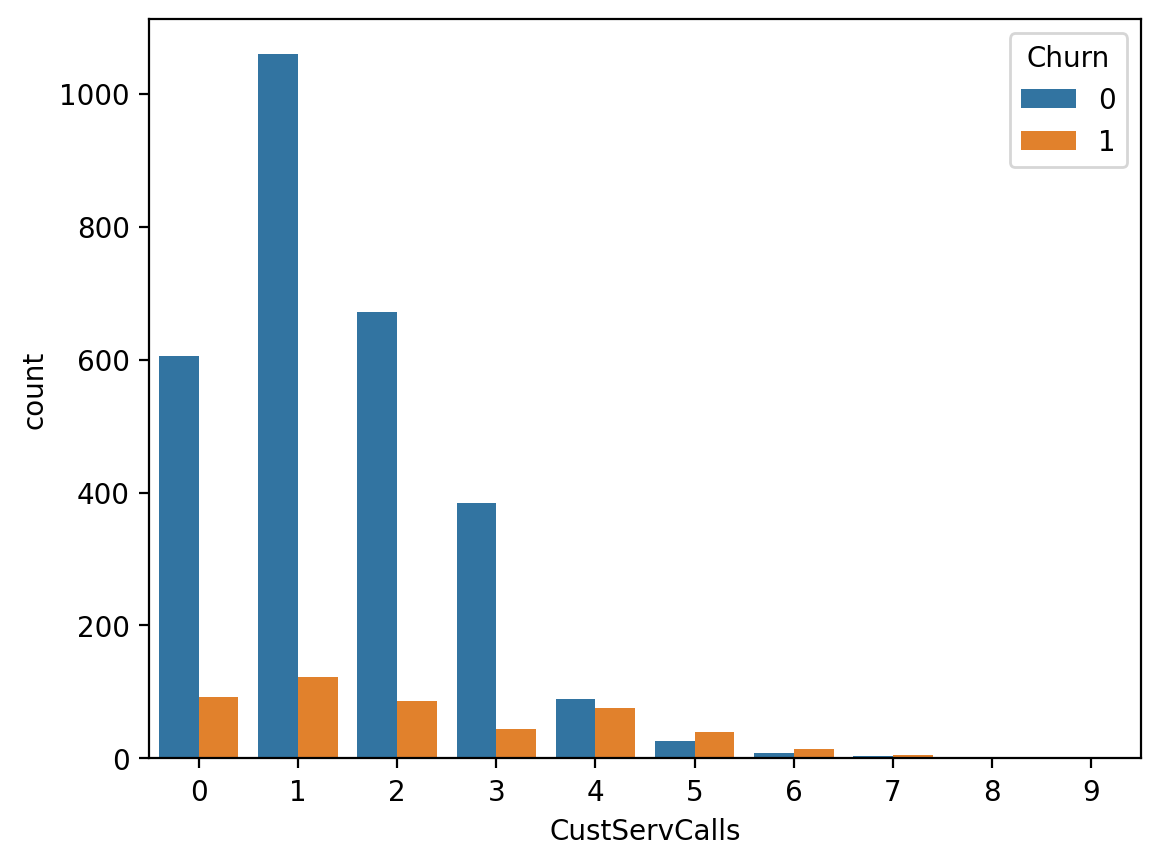

In [14]:
sns.countplot(x="CustServCalls", hue="Churn", data=df);

- As per **`Histogram`** of `CustServCalls VS Churn`- it's easy to deduce that the churn rate increases sharply from 4 customer service calls and above.

<Axes: xlabel='ContractRenewal', ylabel='count'>

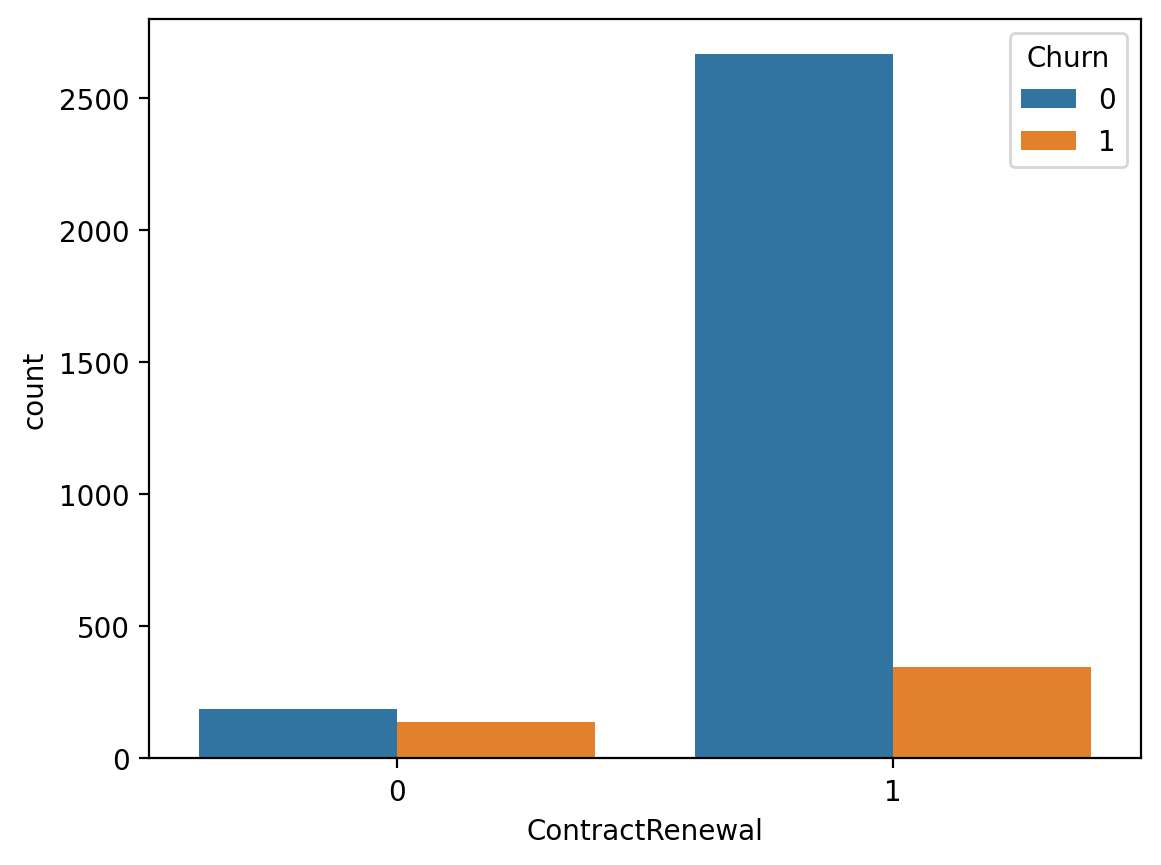

In [15]:
sns.countplot(x = "ContractRenewal", hue = "Churn", data = df)

- As per **`Histogram`** of `Contract Renewal VS Churn`- We see that, with ContractRenewal, the churn rate is much higher, when the contract is not renewed, which is an interesting observation! Perhaps the people who did not renew their contract had a higher possibilty of chruning due to some reason.

### 2.4 Target Feature(Churn) Analysis <a class="anchor" id="ba"></a>

In [16]:
df["Churn"].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [17]:
df["Churn"].value_counts(normalize = True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

# Summary of Exploratory Data Analysis<a class="anchor" id="eda_con"></a>

## Dataset Overview:
- The dataset contains **`3333 rows`** and **`11 columns`**.
- All columns are **`numerical`** with either **`int64`** & **`float64`** data type.
- `Churn` is our `Dependent/Target` feature and the rest are our `Independent` features.
- The Columns `Churn, ContractRenewal, DataPlan, CustServCalls` are `categorical` and the rest have continuous variables.

## Summary Statistics:
- Standard deviations vary across columns, indicating differences in the spread of data.
- The range of values varies for each column, with minimum and maximum values spanning different ranges.

## Data Integrity:
- There are **`no missing values`** in any of the columns.
- **`No duplicate values`** are present in the dataset.

## Univariate Analysis:
- Outlier detection was performed, revealing **`Presence of outliers`** in the `columns containing continuous values`.
- The distribution of data in each column with continuous values was examined, providing insights into the spread and **`central tendencies`** of the data except for the `Data Usage` column.

## Multivariate Analysis:
- As per **`correlation matrix`** - Contract Renewal, CustServCalls and DayMins have the top correlation with Churn.
- As per **`Histogram`** of `Data Plan VS Churn`- We can see that 20% of the population who did not opt for the data plan churned where as ~10% of people who took the plan churn, suggesting that the prices maybe expensive for people and once the data plan was taken, there was not much of an issue with the services due to data plan.
- As per **`Histogram`** of `CustServCalls VS Churn`- it's easy to deduce that the churn rate increases sharply from 4 customer service calls and above. Due to this we can add a column for customers with 4 calls & above. We'll add a binary feature to our DataFrame – `Customer service calls > 3`. And once again, let's see how it relates to churn. 
- As per **`Histogram`** of `Contract Renewal VS Churn`- We see that, with ContractRenewal, the churn rate is much higher, when the contract is not renewed, which is an interesting observation! Perhaps the people who did not renew their contract had a higher possibilty of chruning due to some reason.

## `Target Feature(Churn) Analysis:`
- `As per the analysis - we notice a major DATA IMBALANCE since majority(85.5%) of data in Churn belongs to 0 suggesting customers who did not Churn while and minority(14.5%) of data in Churn belongs to 1 suggesting customer who Churned.`
- This is the biggest problem that we need to address in data pre-processing.

##############################################################################################################################

# `3) Data Preparation`:-

## 3.1 Feature Engineering:

### 3.1.1) We will first `add a Column Average_mins_per_call` by taking the `ratio of DayMins/DayCalls`:

In [18]:
df["Average_mins_per_call"] = df["DayMins"]/df["DayCalls"]

.

### 3.1.2) Now through the Visaulization of **`Histogram`** of `CustServCalls VS Churn`:

* We noticed that the churn rate increases sharply from 4 customer service calls and above. So let's add a binary feature to our DataFrame – `Customer service calls > 3`. 

In [19]:
#Creation of categorical column Many_service_calls with:
#0 when the number of calls to customer service is less than 4 and
#1 when the number of calls to customer service is more than 4 
df["Many_service_calls"] = (df["CustServCalls"] > 3).astype("int")


pd.crosstab(df["Many_service_calls"], df["Churn"], margins=True)

Churn,0,1,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


.

## 3.2 Sampling: 

In [20]:
df["Churn"].value_counts(normalize = True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

### Since we have a class imbalance as shown in the above result, I am using the Smote(Synthetic Minority Over-sampling Technique) to balance my data. 

In [21]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Drop the target variable from features
X = df.drop(columns=['Churn'])
y = df['Churn']

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Initiating SMOTE:
smote = SMOTE(random_state=42)

# Perform SMOTE oversampling
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

# Convert the resampled data back to DataFrame format:
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['Churn'] = y_resampled

# Check the class distribution after oversampling
print(resampled_df['Churn'].value_counts(normalize=True))


0    0.5
1    0.5
Name: Churn, dtype: float64


# Summary for Data Preparation:

## Feature Engineering:
- Added a Column `Average_mins_per_call` by taking the `ratio of DayMins/DayCalls`
- Since through the Visaulization of **`Histogram`** of `CustServCalls VS Churn` - We noticed that the churn rate increases sharply from 4 customer service calls and above. So I added a binary feature to our DataFrame – `Customer service calls > 3`. 

## Sampling:
- Used the Smote (Synthetic Minority Over-sampling Technique) to remove the imbalance in the data.

##############################################################################################################################

# `4) Modelling:`

# 4.1) Model Selection:

## 4.1.1) Logistic regression:

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

# Assuming X contains your features and y contains your target variable
X = resampled_df.drop("Churn", axis=1)  # Drop the "Churn" column from features
y = resampled_df["Churn"]

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Step 5: Extract coefficients and p-values
coefficients = model.coef_[0]
p_values = []

# Calculate p-values
from scipy.stats import t

n = len(y_test)
p = len(X_test.columns)  # Number of features
df = n - p - 1

for i in range(len(coefficients)):
    coef = coefficients[i]
    se = np.sqrt(np.diag(np.linalg.inv(np.dot(X_train.T, X_train))))
    t_stat = coef / se[i]
    p_value = (1 - t.cdf(abs(t_stat), df)) * 2
    p_values.append(p_value)

# Print coefficients and p-values
for i in range(len(coefficients)):
    print(f"Variable: {X.columns[i]}, Coefficient: {coefficients[i]}, p-value: {p_values[i]}")

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       585
           1       0.83      0.88      0.85       555

    accuracy                           0.85      1140
   macro avg       0.85      0.85      0.85      1140
weighted avg       0.86      0.85      0.85      1140

Variable: AccountWeeks, Coefficient: 0.0025755558813219453, p-value: 8.663292305755022e-12
Variable: ContractRenewal, Coefficient: -3.012961235063804, p-value: 0.0
Variable: DataPlan, Coefficient: -0.41090746129863026, p-value: 0.0018121349528432695
Variable: DataUsage, Coefficient: 0.008992380869511088, p-value: 0.9868012945362417
Variable: CustServCalls, Coefficient: 0.1503300377056595, p-value: 0.0
Variable: DayMins, Coefficient: 0.031511668915600186, p-value: 0.0005968604032016156
Variable: DayCalls, Coefficient: -0.021713858392518322, p-value: 0.0
Variable: MonthlyCharge, Coefficient: -0.012185201642979633, p-value: 0.8219675828735562
Variable: OverageFee, Coe

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


.

## 4.1.2) Decision Tree:

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       585
           1       0.90      0.94      0.92       555

    accuracy                           0.92      1140
   macro avg       0.92      0.92      0.92      1140
weighted avg       0.92      0.92      0.92      1140



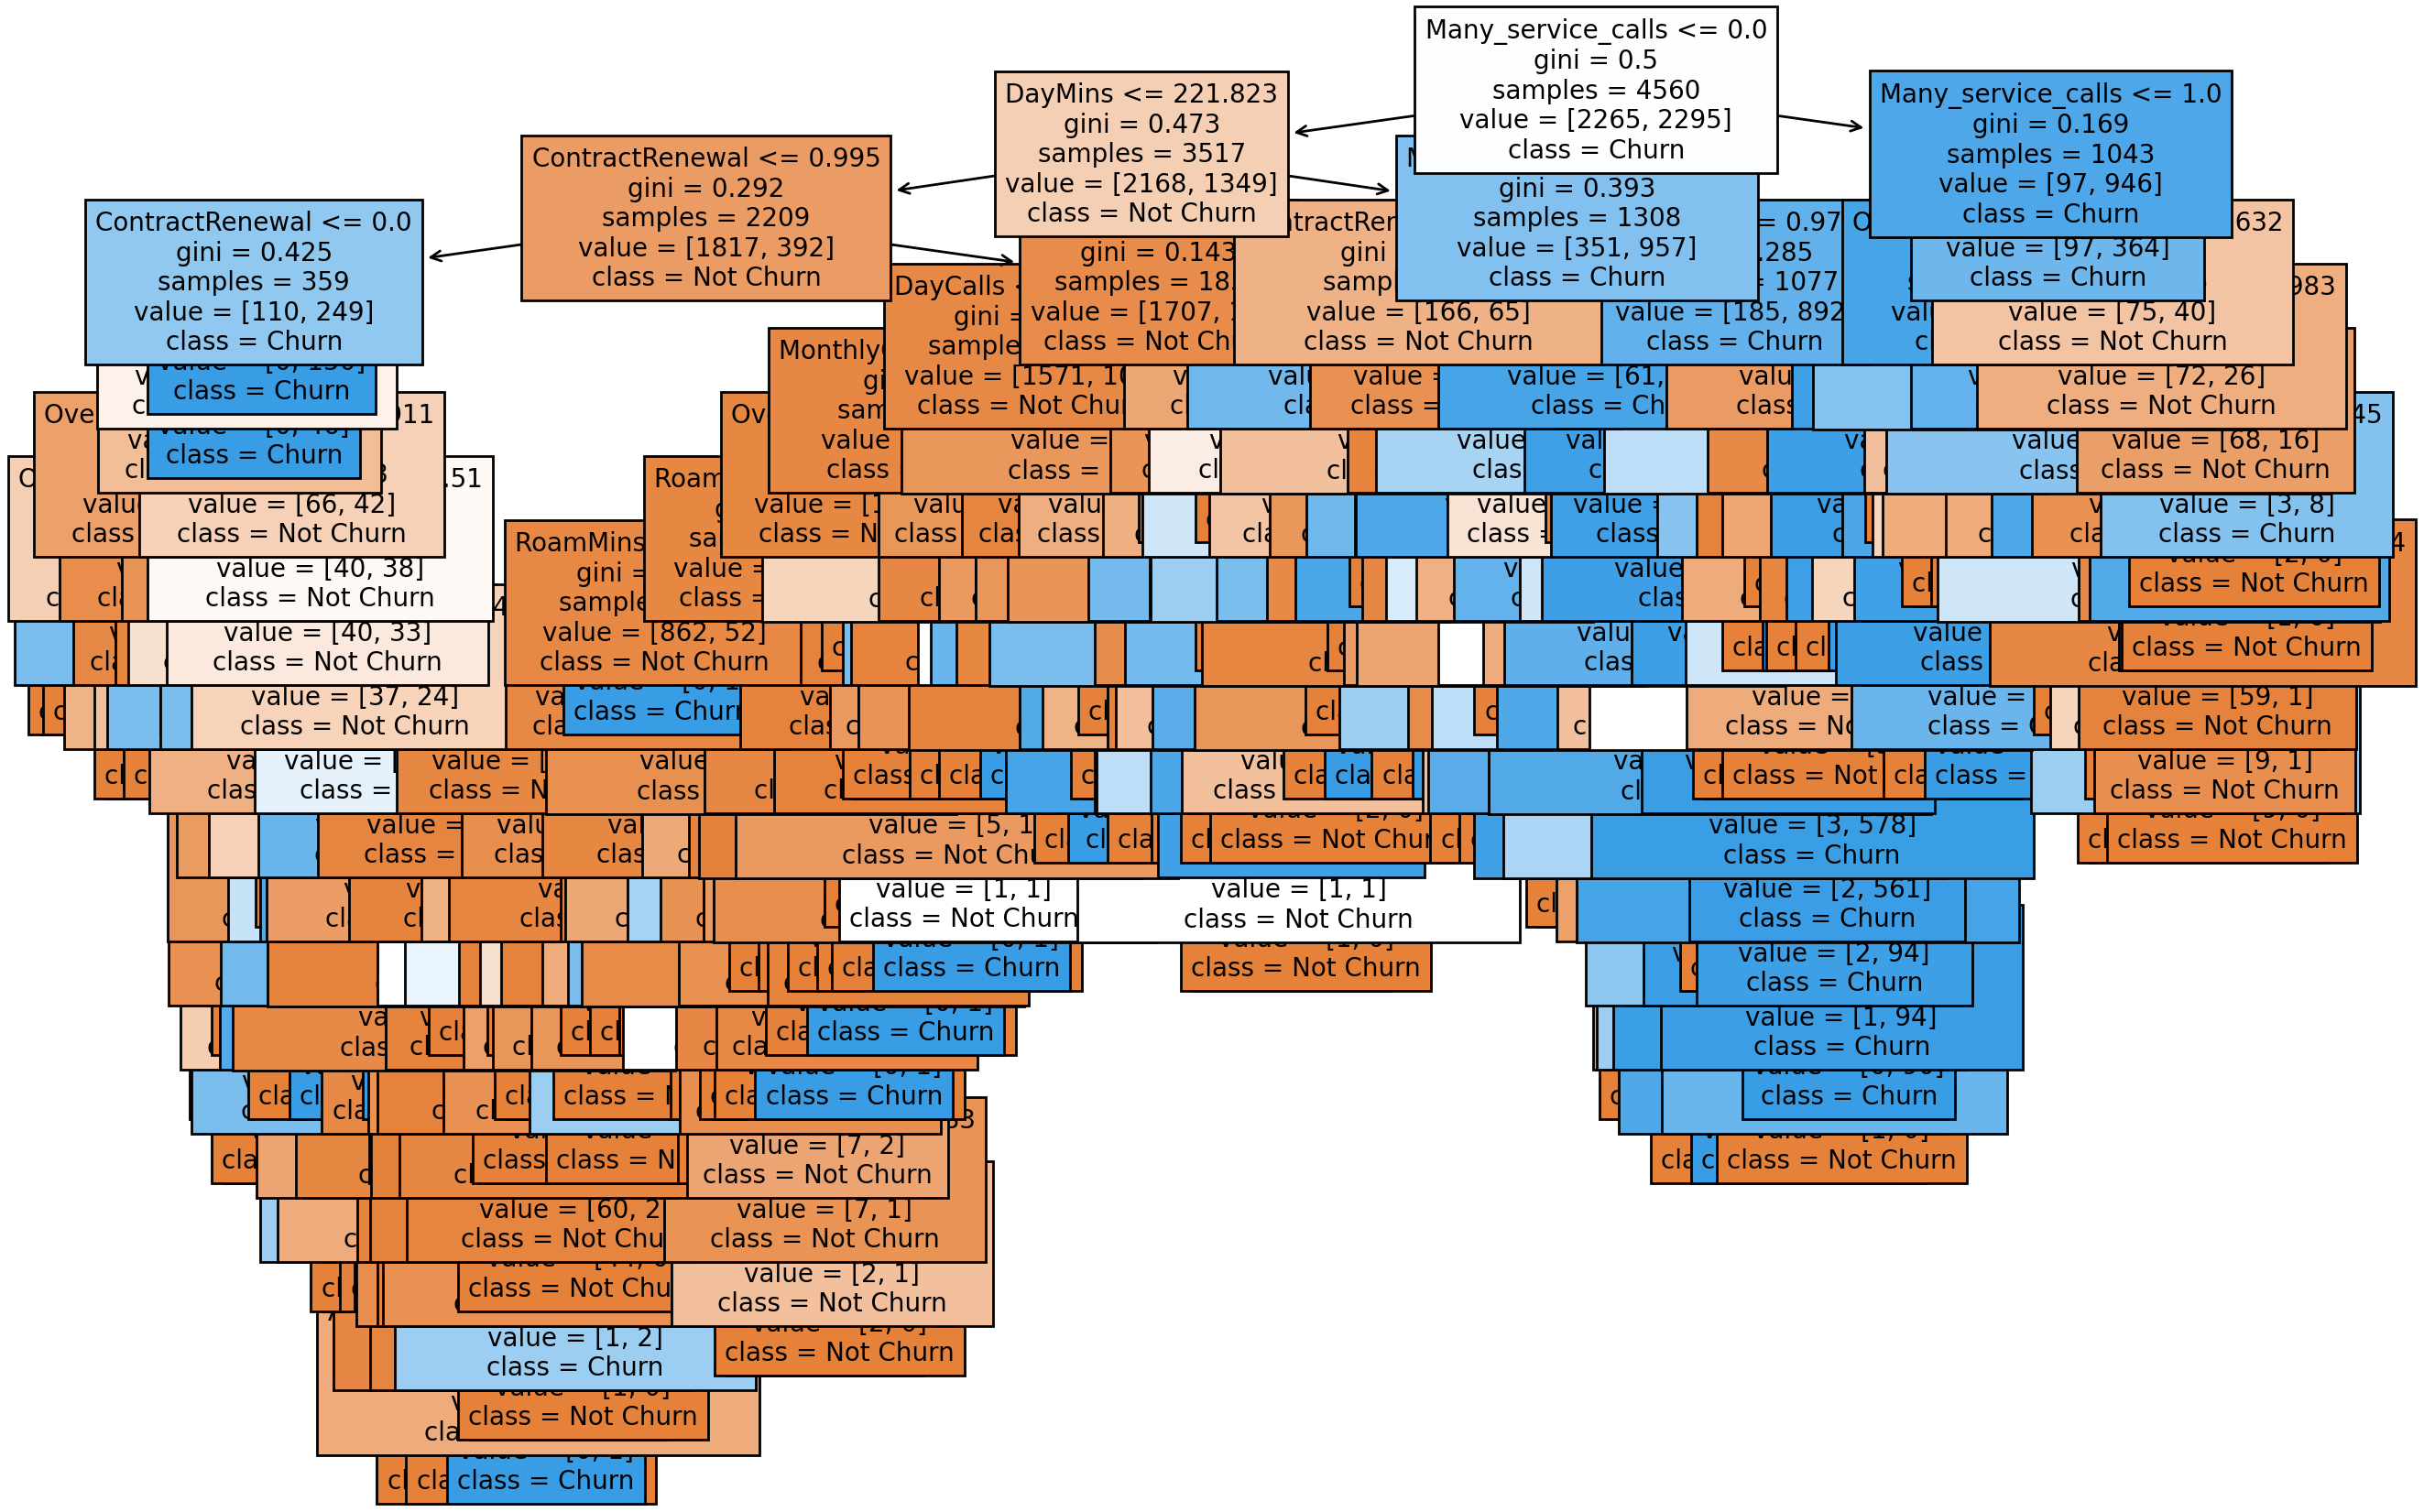

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Add plot_tree import
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Assuming X contains your features and y contains your target variable
X = resampled_df.drop("Churn", axis=1)  # Assuming "Churn" is your target variable
y = resampled_df["Churn"]

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Create a Decision Tree classifier
model = DecisionTreeClassifier()

# Step 3: Train the model
model.fit(X_train, y_train)

# Step 4: Make predictions on the testing set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
# Calculate precision, recall, f1-score, and support for each class
print(classification_report(y_test, y_pred))

# Step 6: Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=["Not Churn", "Churn"], filled=True, fontsize=10)
plt.show()

.

## 4.1.3) Random Forest:

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       585
           1       0.95      0.96      0.95       555

    accuracy                           0.95      1140
   macro avg       0.95      0.95      0.95      1140
weighted avg       0.95      0.95      0.95      1140

Predicted probabilities of churning:
[0.01 0.44 0.99 ... 0.23 0.01 0.22]


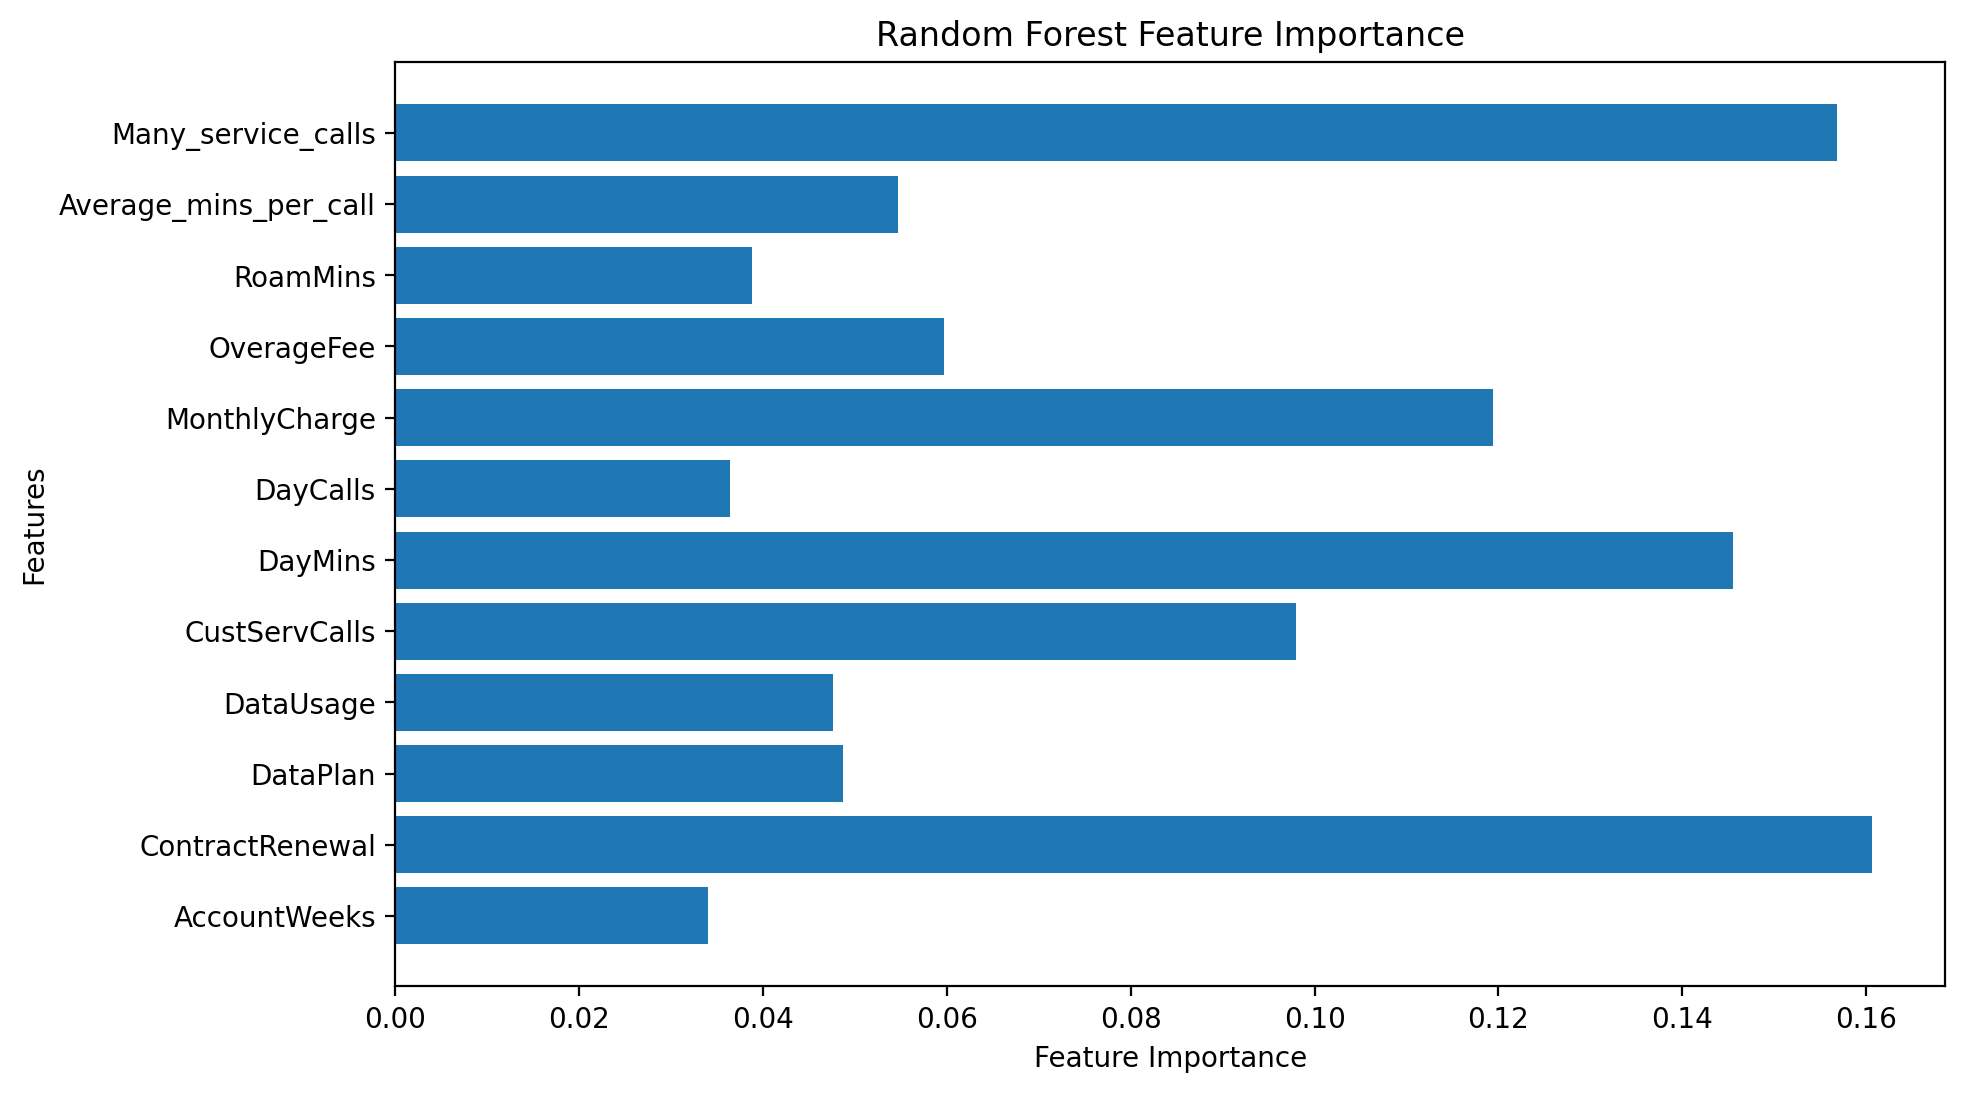

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Assuming X contains your features and y contains your target variable
X = resampled_df.drop("Churn", axis=1)  # Drop the target variable from features
y = resampled_df["Churn"]

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators as needed
rf_model.fit(X_train, y_train)

# Step 4: Evaluate model
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Step 5: Predict probabilities
y_probabilities = rf_model.predict_proba(X_test)[:,1]# Probabilities of positive class (churning)
print("Predicted probabilities of churning:")
print(y_probabilities)

# Step 6: Visualize feature importance
feature_importance = rf_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

# Since the accuracy of the Random forest is greatest when comparing with other models. Hence, we are choosing Random forest for all our further work.

## Performance comparison between Train and Test data

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 7: Evaluate model on training set
y_train_pred = rf_model.predict(X_train)

# Step 8: Compare performance on training and testing sets
print("Training Set Metrics:")
print(classification_report(y_train, y_train_pred))

print("\nTesting Set Metrics:")
print(classification_report(y_test, y_pred))

Training Set Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2265
           1       1.00      1.00      1.00      2295

    accuracy                           1.00      4560
   macro avg       1.00      1.00      1.00      4560
weighted avg       1.00      1.00      1.00      4560


Testing Set Metrics:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       585
           1       0.95      0.96      0.95       555

    accuracy                           0.95      1140
   macro avg       0.95      0.95      0.95      1140
weighted avg       0.95      0.95      0.95      1140



## Performing Cross Validation:

In [26]:
# Step 9: Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
print("\nCross-Validation Scores:")
print(cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores:
[0.83859649 0.92192982 0.93596491 0.92719298 0.93421053]
Mean CV Score: 0.9115789473684212


## Creating a Confusion Matrix:

Confusion Matrix:
[[555  30]
 [ 23 532]]


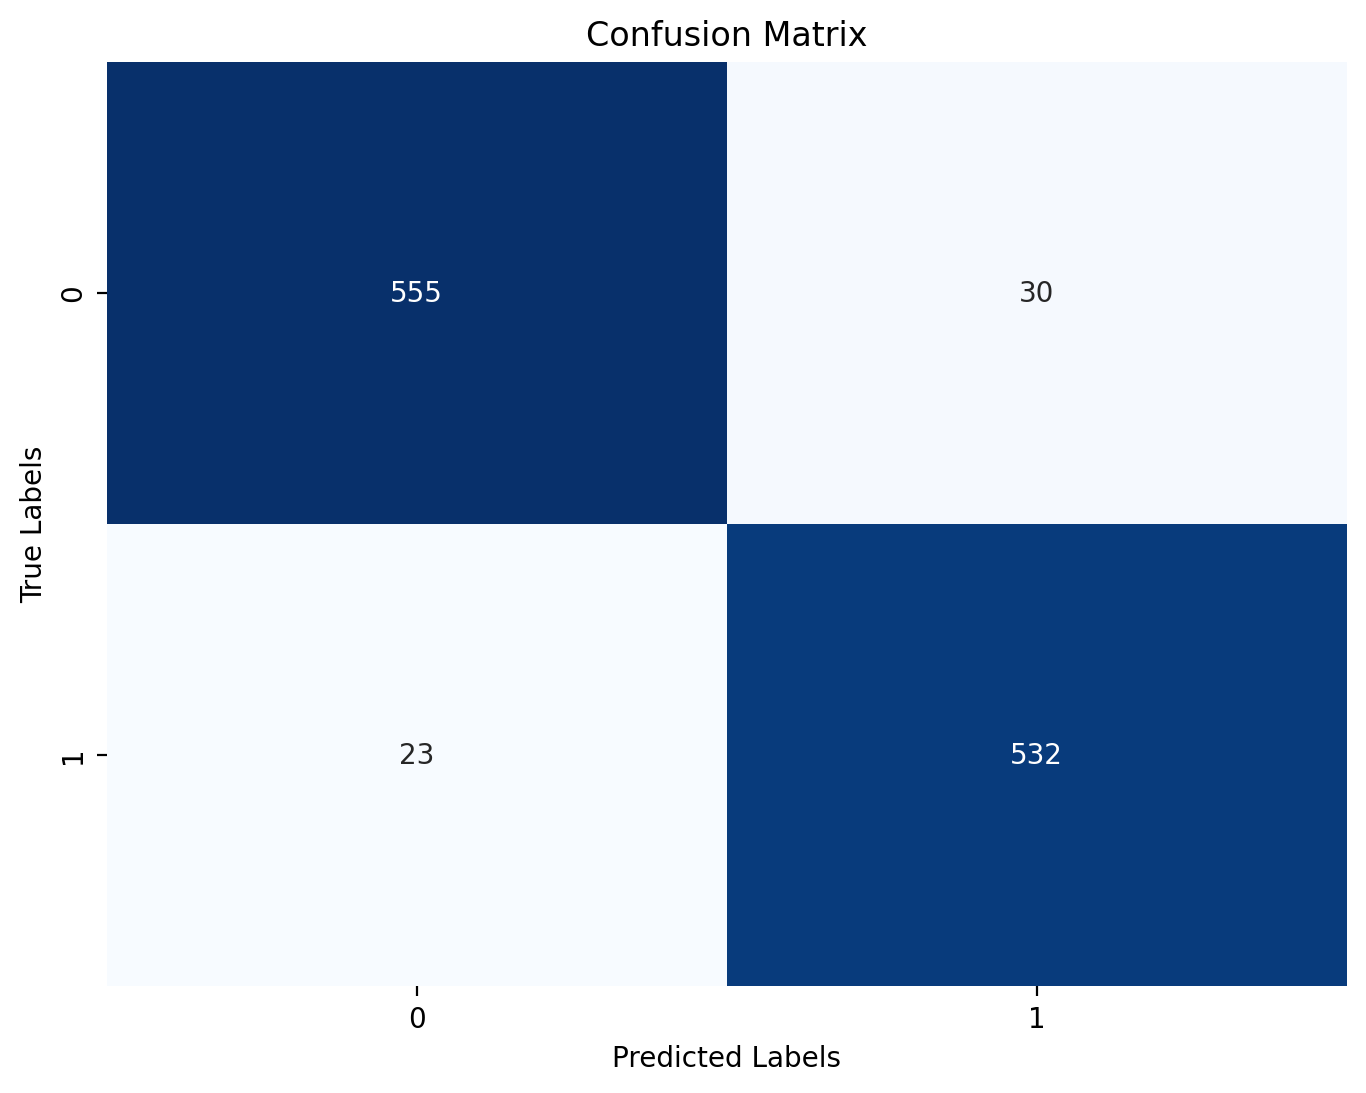

In [27]:
from sklearn.metrics import confusion_matrix

# Step 10: Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Step 11: Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## Summary of Confusion Matrix:

- True Negatives (TN): 555
- False Positives (FP): 30
- False Negatives (FN): 23
- True Positives (TP): 532

## Getting the roc_curve

AUC-ROC Score: 0.9536382536382536


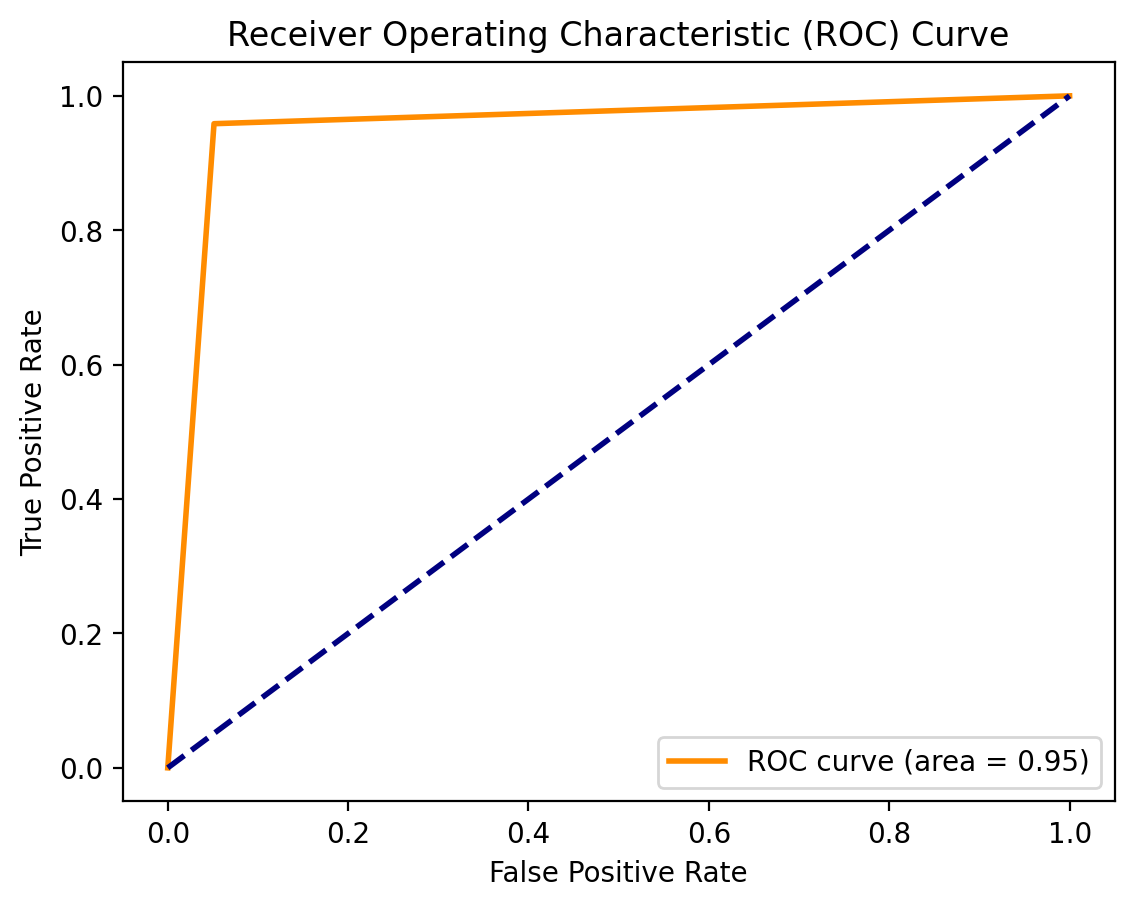

AUC-ROC Accuracy: 0.9535087719298245


In [28]:
from sklearn.metrics import roc_curve, auc, accuracy_score

# Step 11: Calculate AUC-ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("AUC-ROC Score:", roc_auc)

# Plot AUC-ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate AUC-ROC accuracy (optional)
roc_accuracy = accuracy_score(y_test, y_pred)
print("AUC-ROC Accuracy:", roc_accuracy)


# Summary for modelling:

- Trained and tested 3 models Logistic Regression, Decision Tree and Random forest.
- Out of all 3 models, the value for accuracy was the best for Random forest. So, for any further computation on this dataset I am going to use Random forest.

##############################################################################################################################

.

# Deployment

## Deployment of model on a new data point and checking the probability of certainity for the same:

In [36]:
# Assuming new_data_point is the data point you want to predict
new_data_point = [[156.0, 1.0, 1.0, 15.0, 1.0, 120.0, 82.0, 46.0, 9.87, 10.0, 2.41, 0.0]]

# Create a DataFrame from the new_data_point
new_data_df = pd.DataFrame(new_data_point, columns=X.columns)

# Now, you can use your trained Random Forest model to predict the class or probability
predicted_class = model.predict(new_data_df)
predicted_probability = model.predict_proba(new_data_df)

print("Predicted Class:", predicted_class)
print("Predicted Probability:", predicted_probability)


Predicted Class: [0]
Predicted Probability: [[1. 0.]]


The predicted probabilities represent the model's confidence or certainty in its predictions. For each class, the predicted probability value is between 0 and 1, indicating the likelihood or probability that the data point belongs to that class. In this case, since the predicted probability for class 0 is 1.0 (100%), the model is very confident that the new data point belongs to class 0 ("not churn"). Similarly, since the predicted probability for class 1 is 0.0 (0%), the model is not at all confident that the new data point belongs to class 1 ("churn").

In [32]:
resampled_df.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Average_mins_per_call,Many_service_calls,Churn
0,128.0,1.0,1.0,2.7,1.0,265.1,110.0,89.0,9.87,10.0,2.410000,0.0,0
1,107.0,1.0,1.0,3.7,1.0,161.6,123.0,82.0,9.78,13.7,1.313821,0.0,0
2,137.0,1.0,0.0,0.0,0.0,243.4,114.0,52.0,6.06,12.2,2.135088,0.0,0
3,84.0,0.0,0.0,0.0,2.0,299.4,71.0,57.0,3.10,6.6,4.216901,0.0,0
4,75.0,0.0,0.0,0.0,3.0,166.7,113.0,41.0,7.42,10.1,1.475221,0.0,0


.

# `For Client usage:-`

## If the client wants to use our already trained model on his new dataset then he simply needs to use the follwoing code:

In [ ]:
# Load the new dataset
new_data = pd.read_csv("new_data.csv")  # Adjust the filename and path as per the new dataset

# Preprocess the new dataset to ensure it has the same features as the training dataset
# For example, if you need to drop the "Churn" column:
new_data_processed = new_data.drop("Churn", axis=1)

# Use the trained model to predict churn probability or class for the new data
predicted_class = model.predict(new_data_processed)
predicted_probability = model.predict_proba(new_data_processed)

print("Predicted Class:", predicted_class)
print("Predicted Probability:", predicted_probability)

# For Evaluation:

In [ ]:
# Evaluate the model's performance
# Assuming y_true contains the true labels for the new dataset
y_true = new_data["Churn"]

# Evaluate accuracy
accuracy = accuracy_score(y_true, predicted_class)
print("Accuracy:", accuracy)

# Evaluate classification report
classification_rep = classification_report(y_true, predicted_class)
print("Classification Report:\n", classification_rep)


# For Confusion Matrix:

In [ ]:
# Evaluate the confusion matrix
confusion_mat = confusion_matrix(y_true, predicted_class)
print("Confusion Matrix:\n", confusion_mat)

## For the given business problem which of the below metric(s) did you choose and why? Include in your final output any additional activity performed (and its results) to get to the best values of the below metrics (F1-Score, AUC-ROC curve, AUC-ROC Accuracy). Accuracy
* Accuracy
* Precision
* Recall

For a churn prediction problem, where identifying potential churn customers is crucial for business retention strategies, precision and recall are typically more important than accuracy. Maximizing both precision (to minimize false positives) and recall (to minimize false negatives) is essential for effectively identifying and retaining churn-prone customers. Therefore, optimizing for precision, recall, and F1-score would be preferable in this scenario. Techniques such as feature engineering, model selection, hyperparameter tuning, and handling class imbalance can be used to enhance model performance.